In [1]:
#!/usr/bin/env python
'''
DESCRIPTION
-----------
    Encoding information

RETURN
------
    {EXPERIMENT}_enc.png : png file
        graph


EXPORTED FILE(s) LOCATION
-------------------------
    ./reports/encoding/{EXPERIMENT}/{DESING}_enc.png
'''

# importing default libraries
SEED=91
# to get reproducible results
import os, argparse, sys
import tensorflow as tf
tf.random.set_seed(SEED)
import numpy as np
np.random.seed(SEED)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)
# importing scripts in scripts folder
from scripts import config as src

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from tensorflow import keras

rand_state=91
TINY_SIZE = 8
SMALL_SIZE = 10
NORMAL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=12)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=TINY_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=TINY_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('legend', title_fontsize=NORMAL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## MELANOMA

In [3]:
# loc = './reports/encoding/exper_melanoma'
split = 'train_test_split'
experiment = 'exper_melanoma'
loc_read = os.path.join(src.DIR_MODELS, experiment, split)

df = pd.read_pickle('./data/processed/exper_melanoma/query_log1p.pck')

X = df.iloc[:, :-1].values
y_ground_truth = df.iloc[:, -1:]

print('shape of feature and traget dataset, feature dataset, {0}, target column {1}'.format(X.shape, y_ground_truth.shape))

shape of feature and traget dataset, feature dataset, (3412, 17994), target column (3412, 1)


/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_melanoma/train_test_split/encoding_1_layer_signaling_reference_log1p_Adam_relu.h5
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_melanoma/train_test_split/encoding_2_layer_signaling_reference_log1p_Adam_relu.h5


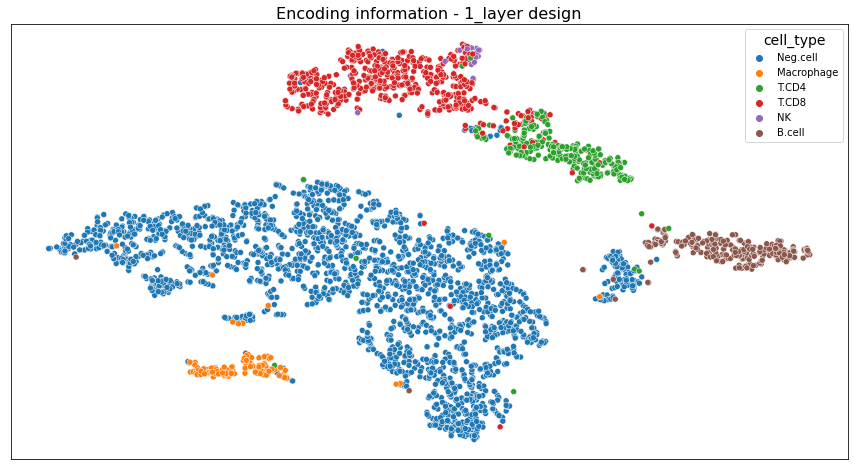

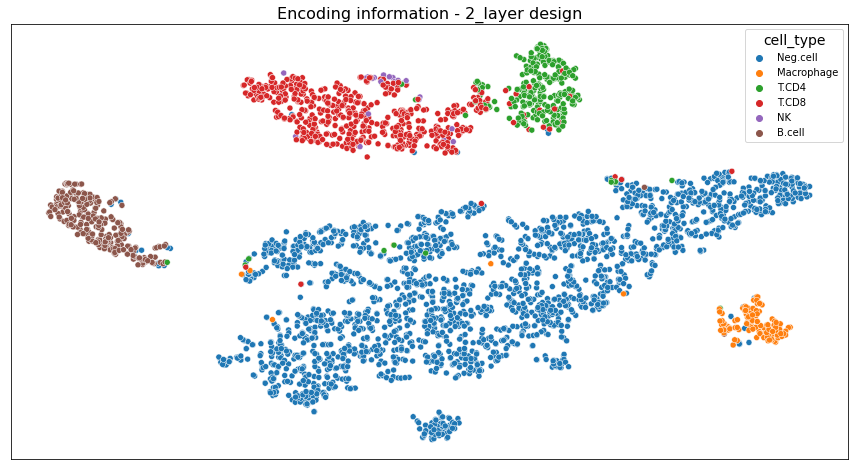

In [5]:
np.random.seed(SEED)
for i_design in ['1_layer','2_layer']:
    print(glob.glob(os.path.join(loc_read, f'encoding_{i_design}*'))[0])
    model = keras.models.load_model( glob.glob(os.path.join(loc_read, f'encoding_{i_design}*'))[0] , compile=False)
    encoding = model.predict(X)
    tsne = TSNE().fit_transform(encoding)

    df_encoding_tsne = pd.concat([pd.DataFrame(tsne, columns=['tsne1', 'tsne2']), y_ground_truth], axis=1)

    plt.figure(figsize=(15,8))
    
    sns.scatterplot(data=df_encoding_tsne, x='tsne1', y='tsne2', hue='cell_type')
    plt.title('Encoding information - '+i_design+' design')
    
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig(f'./reports/encoding/{experiment}/mel_enc_query_'+i_design+'.png', dpi=300, bbox_inches = 'tight')
    plt.savefig(f'./reports/encoding/{experiment}/mel_enc_query_'+i_design+'.pdf', dpi=300, bbox_inches = 'tight')
    plt.savefig(f'./reports/encoding/{experiment}/mel_enc_query_'+i_design+'.svg', dpi=300, bbox_inches = 'tight')
    

In [6]:
del(df)
del(df_encoding_tsne)
del(X, y_ground_truth)
del(split, experiment, loc_read)

## MOUSE

In [7]:
split = 'train_test_split'
experiment = 'exper_mouse'
loc_read = os.path.join(src.DIR_MODELS, experiment, split)

df_retrieval_org = pd.read_pickle('./data/external/exper_mouse/3-33_integrated_retrieval_set.pck')
print(df_retrieval_org.shape)
df_retrieval_org.head()

df_retrieval = pd.read_pickle('./data/processed/exper_mouse/mouse_retrieval_sw_gw_cv.pck')
df_retrieval = pd.merge(left=df_retrieval, right=df_retrieval_org[['Label']], left_index=True, right_index=True, how='left')
print(df_retrieval.shape)
df_retrieval.head()


X = df_retrieval.iloc[:, :-2].values
y_ground_truth = df_retrieval.iloc[:, -2]

print('shape of feature and traget dataset, feature dataset, {0}, target column {1}'.format(X.shape, y_ground_truth.shape))

(17293, 9438)
(13645, 9439)
shape of feature and traget dataset, feature dataset, (13645, 9437), target column (13645,)


/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_mouse/train_test_split/encoding_1_layer_signaling_mouse_learning_sw_gw_Adam_relu.h5
1_layer
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_mouse/train_test_split/encoding_2_layer_signaling_mouse_learning_sw_gw_Adam_relu.h5
2_layer


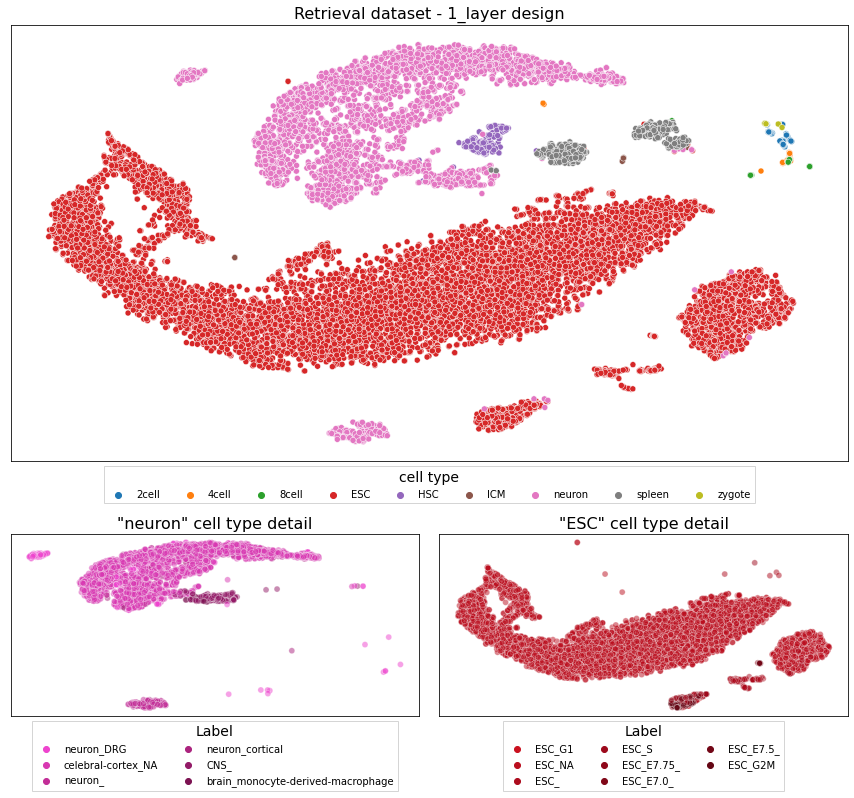

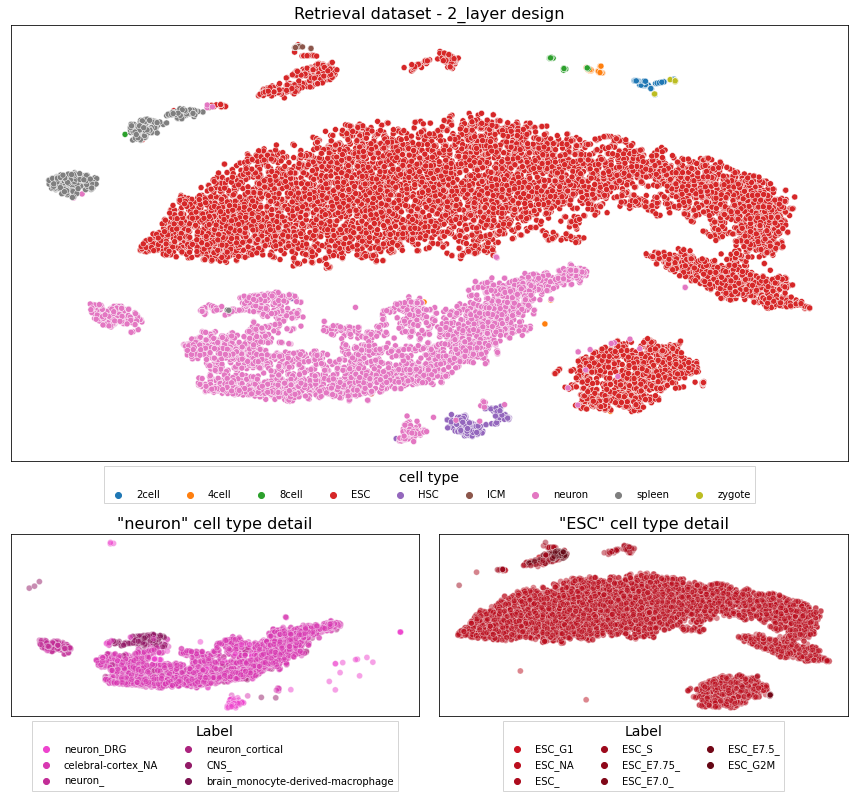

In [8]:
np.random.seed(SEED)
pink_color=['#ee44ce','#d838b2','#c22d97','#ab237e','#931a67','#7c1252']
red_color=['#ca111f','#bb0e1e','#ac0b1d','#9d091c','#8f081a','#800718','#720616','#640614']

for i_design in ['1_layer','2_layer']:

    print(glob.glob(os.path.join(loc_read, f'encoding_{i_design}*'))[0])
    model = keras.models.load_model( glob.glob(os.path.join(loc_read, f'encoding_{i_design}*'))[0] , compile=False)
    encoding = model.predict(X)
    print(i_design)
    
    encoding = model.predict(X)
    tsne = TSNE().fit_transform(encoding)

    df_encoding_tsne = df_encoding_tsne = pd.concat([pd.DataFrame(tsne, columns=['tsne1', 'tsne2'])
                                  , pd.DataFrame(np.array(y_ground_truth),columns=['cell_type'])], axis=1)
    sorter_index=dict(zip(sorted(set(df_retrieval['cell_type'])), range(len(set(df_retrieval['cell_type']))) ))
    df_encoding_tsne['order'] = df_encoding_tsne['cell_type'].map(sorter_index)
    df_encoding_tsne['Label'] = df_retrieval['Label'].values
    df_encoding_tsne
    
    
    fig = plt.figure(figsize=(15,12))
    ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2, rowspan=2)
    ax3 = plt.subplot2grid((3, 2), (2, 0), colspan=1)
    ax5 = plt.subplot2grid((3, 2), (2, 1), colspan=1)

    sns.scatterplot(data=df_encoding_tsne.sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='cell_type', ax=ax1, alpha=1., marker="o")
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), title='cell type', fancybox=False, shadow=False, ncol=len(y_ground_truth.unique()));

    sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['neuron'])].sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='Label', ax=ax3, alpha=.5, marker="o", palette=pink_color)
    ax3.legend(loc='upper center', bbox_to_anchor=(.5, 0.0), title='Label', fancybox=False, shadow=False, ncol=2, fontsize=SMALL_SIZE)

    sns.scatterplot(data=df_encoding_tsne.loc[df_encoding_tsne['cell_type'].isin(['ESC'])].sort_values(by='order')
                    , x='tsne1', y='tsne2', hue='Label', ax=ax5, alpha=.5, marker="o", palette=red_color)
    ax5.legend(loc='upper center', bbox_to_anchor=(.5, 0.0), title='Label', fancybox=False, shadow=False, ncol=3, fontsize=SMALL_SIZE)

    for axes in [ax1,ax3,ax5]:
        axes.axes.xaxis.set_visible(False)
        axes.axes.yaxis.set_visible(False)

    # fig.suptitle('Neural Network Encoding', fontsize=14)
    ax1.set_title('Retrieval dataset - '+i_design+' design')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    ax3.set_title('"neuron" cell type detail')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    ax5.set_title('"ESC" cell type detail')#, fontdict={'fontsize': 10, 'fontweight': 'medium'})
    # plt.tight_layout()
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.05, 
                        hspace=0.4)

    plt.savefig(f'./reports/encoding/{experiment}/mouse_enc_'+i_design+'.png', dpi=300, bbox_inches = 'tight')
    plt.savefig(f'./reports/encoding/{experiment}/mouse_enc_'+i_design+'.svg', dpi=300, bbox_inches = 'tight')
    plt.savefig(f'./reports/encoding/{experiment}/mouse_enc_'+i_design+'.pdf', dpi=300, bbox_inches = 'tight')
    

In [10]:
del(df_retrieval)
del(df_retrieval_org)
del(df_encoding_tsne)
del(X, y_ground_truth)
del(split, experiment, loc_read)

NameError: name 'df_retrieval' is not defined

## IMMUNE

In [14]:
split = 'train_test_split'
experiment = 'exper_immune'
loc_read = os.path.join(src.DIR_MODELS, experiment, split)
df_immune = pd.read_pickle('./data/processed/exper_immune/fig3.pck')

X = df_immune.iloc[:, :-1].values
y = df_immune.iloc[:, -1:]
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y.values).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=rand_state, stratify=y_ohe)
target_y = pd.concat([y_train, y_test])

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_immune/train_test_split/encoding_1_layer_signaling_fig3_Adam_relu.h5
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/models/exper_immune/train_test_split/encoding_2_layer_signaling_fig3_Adam_relu.h5


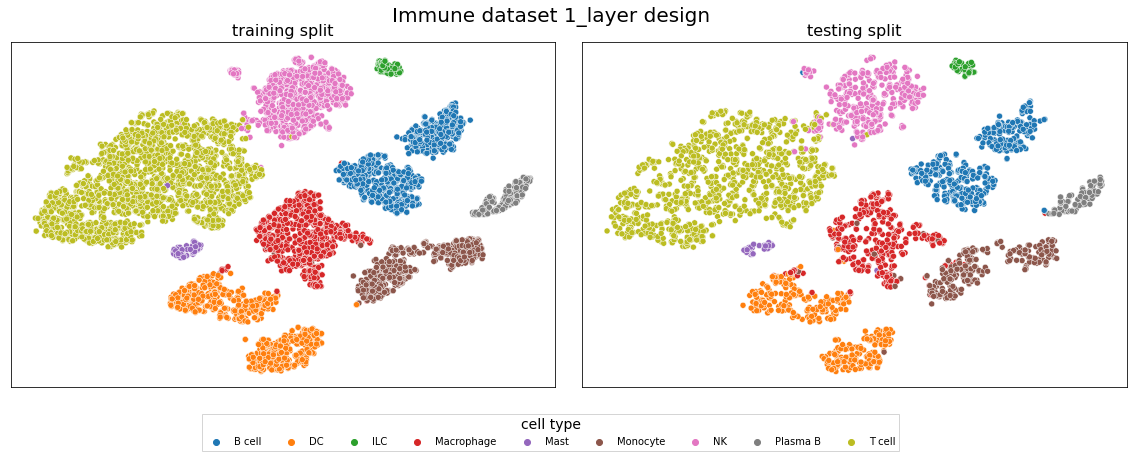

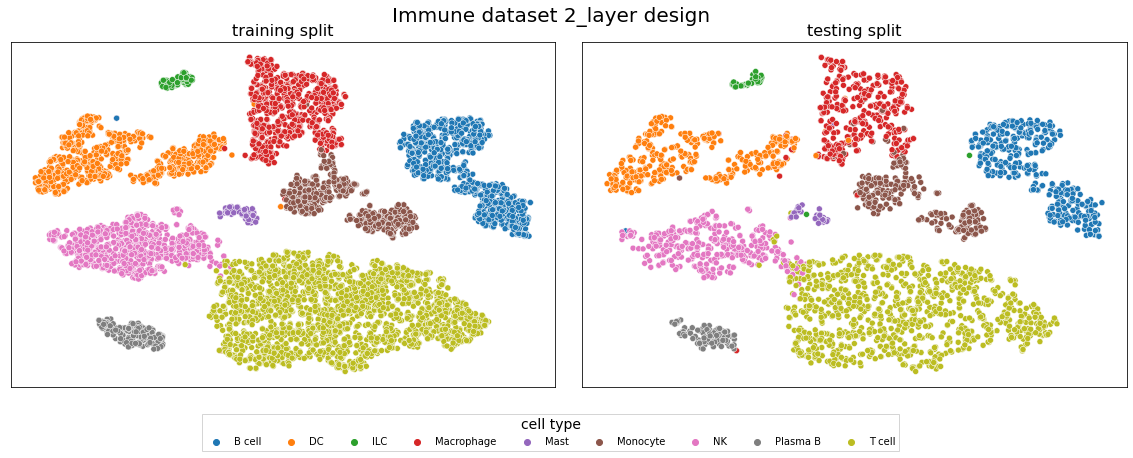

In [16]:
np.random.seed(91)
for i_design in ['1_layer','2_layer']:

    print(glob.glob(os.path.join(loc_read, f'encoding_{i_design}*'))[0])
    model = keras.models.load_model( glob.glob(os.path.join(loc_read, f'encoding_{i_design}*'))[0] , compile=False)
    
    encoding_train = pd.DataFrame(model.predict(X_train))
    encoding_train['training_testing']='training'
    encoding_test = pd.DataFrame(model.predict(X_test))
    encoding_test['training_testing']='testing'
    
    target_y = pd.concat([y_train, y_test])
    
    encoding_comb = pd.concat([encoding_train, encoding_test], axis=0).reset_index(drop=True)
    
    tsne_encoding = TSNE().fit_transform(encoding_comb.iloc[:, :-1])
    
    df_encoding_tsne = pd.concat([pd.DataFrame(tsne_encoding, columns=['tsne1', 'tsne2'])
                              , encoding_comb['training_testing'].reset_index(drop=True)
                              , target_y.reset_index(drop=True)], axis=1)

    
    fig, axes= plt.subplots(ncols=2, figsize=(20,6))
    sns.scatterplot(data=df_encoding_tsne[df_encoding_tsne['training_testing']=='training']
                    , x='tsne1', y='tsne2'
                    , hue='cell_type', ax=axes[0]
                    , hue_order=sorted(set(df_encoding_tsne['cell_type'])))
    axes[0].get_legend().remove()
    axes[0].set_title('training split')

    sns.scatterplot(data=df_encoding_tsne[df_encoding_tsne['training_testing']=='testing']
                    , x='tsne1', y='tsne2'
                    , hue='cell_type', ax=axes[1]
                    , hue_order=sorted(set(df_encoding_tsne['cell_type'])))
    axes[1].get_legend().remove()
    axes[1].set_title('testing split')


    handles, labels = axes[0].get_legend_handles_labels()
    lgd = fig.legend(handles, labels, loc='upper center', title='cell type', bbox_to_anchor=(.5, 0.05), fancybox=False, shadow=False, ncol=9)
    axes[0].axes.get_yaxis().set_visible(False)
    axes[0].axes.get_xaxis().set_visible(False)

    axes[1].axes.get_yaxis().set_visible(False)
    axes[1].axes.get_xaxis().set_visible(False)
    fig.suptitle(f'Immune dataset {i_design} design')
    plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.05, 
                        hspace=0.4)
    
    # fig.savefig('encoding.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.savefig(f'./reports/encoding/{experiment}/immune_enc_'+i_design+'.png', dpi=300, bbox_inches = 'tight')
    plt.savefig(f'./reports/encoding/{experiment}/immune_enc_'+i_design+'.pdf', dpi=300, bbox_inches = 'tight')
    plt.savefig(f'./reports/encoding/{experiment}/immune_enc_'+i_design+'.svg', dpi=300, bbox_inches = 'tight')

In [17]:
del(df_immune)
del(df_encoding_tsne)
del(X,y ,y_ohe)
del(X_train, y_train)
del(X_test, y_test)
del(split, experiment, loc_read)